In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import random
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, GlobalAveragePooling2D
from keras.applications.resnet import ResNet50
from keras import initializers
from keras.optimizers import RMSprop
import time


Using TensorFlow backend.


### Print Dataset Directory

In [2]:
data_dir = os.listdir('../../../train_ds/')
for data in data_dir: 
    print(data)

cremad4896-5.wav
cremad5772-1.wav
tess1191-4.wav
cremad503-5.wav
cremad4190-3.wav
cremad864-2.wav
cremad205-0.wav
cremad2123-1.wav
cremad5581-4.wav
tess617-5.wav
cremad1081-2.wav
tess1319-1.wav
cremad4916-0.wav
tess1884-2.wav
tess994-3.wav
cremad6612-0.wav
tess118-0.wav
cremad7116-1.wav
cremad2178-0.wav
tess1164-4.wav
cremad6652-3.wav
cremad5045-3.wav
tess1221-1.wav
cremad4804-2.wav
tess2653-6.wav
cremad1223-1.wav
cremad4846-4.wav
tess625-5.wav
cremad3378-5.wav
cremad3639-5.wav
cremad6468-3.wav
cremad3940-1.wav
cremad1890-2.wav
cremad3626-4.wav
tess2677-6.wav
cremad4406-1.wav
tess502-0.wav
cremad6539-5.wav
cremad4591-1.wav
cremad6007-4.wav
tess1786-5.wav
cremad6846-5.wav
cremad2790-3.wav
tess2787-6.wav
cremad5995-1.wav
cremad2751-3.wav
cremad7193-2.wav
tess1406-2.wav
cremad1008-4.wav
cremad2195-2.wav
cremad1725-5.wav
tess404-0.wav
cremad6143-3.wav
cremad3105-4.wav
tess290-3.wav
tess2161-6.wav
tess631-5.wav
cremad5200-1.wav
cremad2009-3.wav
cremad1049-4.wav
cremad7103-5.wav
cremad463-5.

cremad4983-2.wav
cremad833-2.wav
cremad3488-4.wav
tess2331-1.wav
cremad2151-2.wav
tess671-5.wav
cremad5925-3.wav
cremad2357-5.wav
cremad6160-4.wav
tess1244-1.wav
cremad2458-5.wav
tess392-3.wav
cremad3942-5.wav
cremad3249-3.wav
cremad3983-2.wav
cremad967-2.wav
cremad6390-2.wav
cremad1086-1.wav
cremad6382-4.wav
tess2353-1.wav
cremad447-5.wav
tess1207-1.wav
cremad1600-1.wav
cremad2287-3.wav
tess1241-1.wav
tess1862-2.wav
tess1235-1.wav
cremad3646-3.wav
tess526-0.wav
tess777-5.wav
cremad4628-0.wav
tess1305-1.wav
cremad7067-2.wav
cremad4668-2.wav
tess2227-1.wav
tess1804-2.wav
cremad5328-0.wav
tess2354-1.wav
tess1150-4.wav
cremad3902-1.wav
savee304-1.wav
cremad784-1.wav
cremad4200-5.wav
tess1255-1.wav
cremad4162-4.wav
savee203-3.wav
cremad5896-2.wav
tess1058-4.wav
tess1059-4.wav
cremad6192-0.wav
tess583-0.wav
cremad2776-1.wav
tess2793-6.wav
tess451-0.wav
cremad3798-2.wav
cremad6306-0.wav
cremad4655-3.wav
cremad2836-5.wav
cremad4347-3.wav
tess1750-5.wav
cremad5450-1.wav
cremad6079-1.wav
cremad

tess69-0.wav
cremad4224-1.wav
cremad5386-1.wav
cremad4934-1.wav
cremad6821-0.wav
cremad7381-2.wav
cremad2623-1.wav
tess2715-6.wav
tess2587-4.wav
tess1482-2.wav
cremad4133-2.wav
cremad4711-4.wav
cremad743-2.wav
cremad5408-3.wav
cremad3574-4.wav
cremad2468-3.wav
cremad4391-0.wav
cremad3039-0.wav
cremad3678-3.wav
cremad6531-3.wav
cremad6118-5.wav
tess2341-1.wav
savee63-6.wav
cremad5769-0.wav
cremad119-3.wav
tess1740-5.wav
cremad3057-2.wav
tess1940-2.wav
tess1324-1.wav
cremad4115-4.wav
savee58-1.wav
tess1760-5.wav
cremad6740-1.wav
cremad5955-4.wav
cremad5809-1.wav
tess2034-6.wav
cremad2948-3.wav
tess4-0.wav
cremad585-4.wav
cremad3442-4.wav
tess2109-6.wav
cremad1347-3.wav
tess2083-6.wav
tess2346-1.wav
cremad960-2.wav
cremad1474-5.wav
cremad7061-2.wav
cremad3416-0.wav
tess1774-5.wav
tess2379-1.wav
cremad2443-5.wav
cremad112-0.wav
cremad788-5.wav
cremad5538-4.wav
tess1045-4.wav
cremad6262-5.wav
cremad3089-4.wav
cremad4888-3.wav
tess833-3.wav
cremad2883-3.wav
cremad2729-4.wav
tess2329-1.wav
cr

### Import Dataset

In [3]:
data = pd.DataFrame(columns=['path', 'label'])

cnt = 0
for file in data_dir:
    nm = file.split('.')[0].split('-')
    path = '../../../train_ds/' + file
    label = int(nm[1])

    data.loc[cnt] = [path, label]
    cnt += 1

data.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3



### Testing imported Data


In [4]:
filename = data.path[0]
print (filename)

samples, sample_rate = librosa.load(filename)

../../../train_ds/cremad4896-5.wav


In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Plotting raw Wave Form and Spectrogram

Text(0.5, 0, 'Seconds')

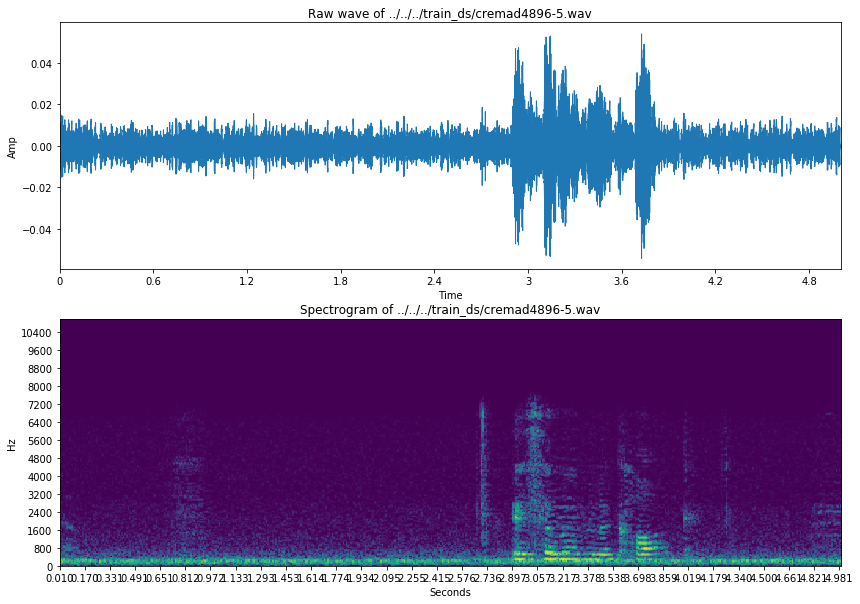

In [6]:
# Plotting Wave Form and Spectrogram

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amp')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Hz')
ax2.set_xlabel('Seconds')

### Cepstral Mean Normalization

In [7]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)

spectrogram = (spectrogram - mean) / std

### Plotting Mel Power Spectrogram

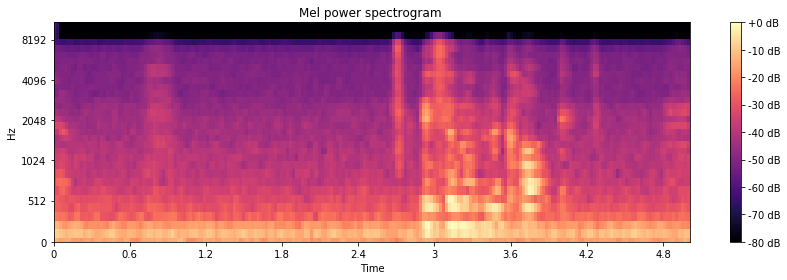

In [8]:
mps = librosa.feature.melspectrogram(samples,
                                     sr=sample_rate,
                                     n_mels=32)

# Convert to log scale
log_mps = librosa.power_to_db(mps, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_mps, sr=sample_rate,
                         x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Plotting MFCC

(32, 216)


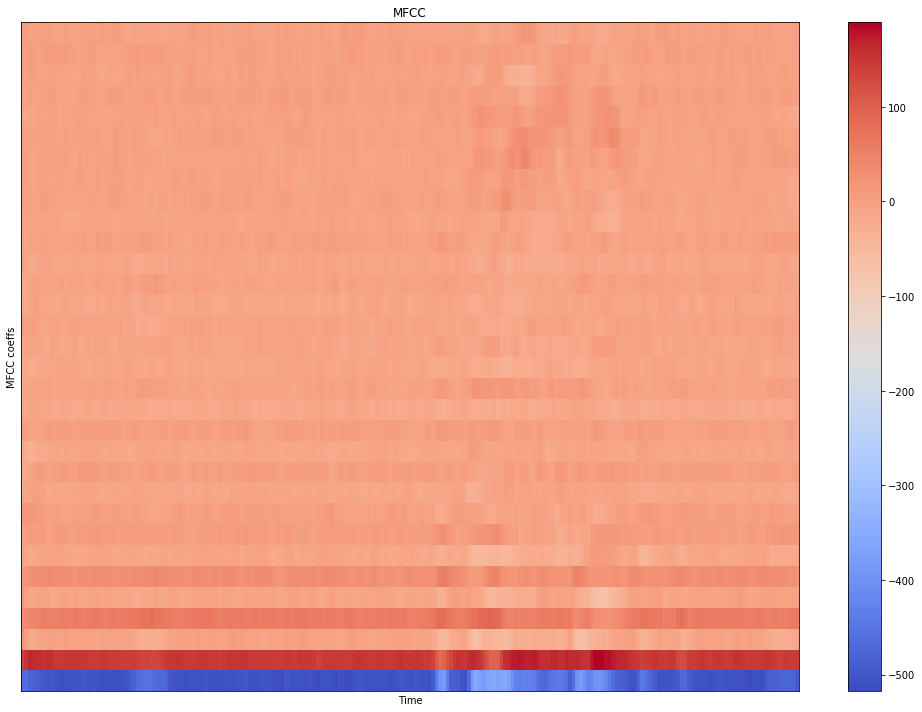

In [9]:
mfcc = librosa.feature.mfcc(y=samples, n_mfcc=32)

plt.figure(figsize=(14, 10))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
print(mfcc.shape)

In [10]:
data2 = data.copy()
data2.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3


### Convert dataset paths into mfccs

In [11]:
data = pd.DataFrame(columns=['feature', 'label'])

for i in tqdm(range(int(len(data2) * 0.2))):
    X, sample_rate = librosa.load(data2.path[i], duration=5, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=32)
    rest = np.zeros((32, 435 - mfcc.shape[1]))
    mfcc = np.hstack((mfcc, rest))
    mfcc = mfcc.reshape((32, 435, 1))
    data.loc[i] = [mfcc, data2.label[i]]

data.head()

100%|██████████| 2144/2144 [00:50<00:00, 42.46it/s]


,feature,label
0,"[[[-462.0721740722656], [-464.367431640625], [...",5
1,"[[[-420.77398681640625], [-364.1893005371094],...",1
2,"[[[-721.6767578125], [-750.8311157226562], [-7...",4
3,"[[[-492.068115234375], [-489.2344055175781], [...",5
4,"[[[-543.486572265625], [-543.7208862304688], [...",3


### Split Test set before augmentation

In [12]:
X_test = data['feature'].values.tolist()
X_test = np.reshape(X_test, (int(len(data2) * 0.2), 32, 435, 1))
y_test = data.label
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

### Define Data Augmentation Methods

In [13]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.03*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 1
    pitch_change =  pitch_pm * 1.05 *(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=0.7,high=2.5)
    return (data * dyn_change)


### Save Augmented Data for testing

In [14]:
X, sample_rate = librosa.load(data2.path[0])
noise_sample = noise(X)
librosa.output.write_wav('noise_sample.wav', noise_sample, sample_rate)
shift_sample = shift(X)
librosa.output.write_wav('shift_sample.wav', shift_sample, sample_rate)
pitch_sample = pitch(X, sample_rate)
librosa.output.write_wav('pitch_sample.wav', pitch_sample, sample_rate)
dyn_change_sample = dyn_change(X)
librosa.output.write_wav('dyn_change_sample.wav', dyn_change_sample, sample_rate)

### Increase Train Set by using Data Augmentation

In [15]:
def rnd_aug(audio_wav):
    perc = np.random.rand()
    if perc < 0.25:
        audio_wav = noise(audio_wav)
    elif perc < 0.5:
        audio_wav = shift(audio_wav)
    elif perc < 0.75:
        audio_wav = pitch(audio_wav, 44100)
    elif perc < 1:
        audio_wav = dyn_change(audio_wav)
    return audio_wav

In [16]:
def batch_generator(audio_wav_paths, labels, batch_size, istraining):
    lb = LabelEncoder()
    while True:
        batch_mfcc = []
        batch_label = []
        for i in range(batch_size):
            if istraining:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.2),
                                         int(len(audio_wav_paths) * 0.8))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=5, res_type='kaiser_fast')
                label = data2.label[rnd_idx]
                #aug_audio_wav = rnd_aug(X)
            else:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.8),
                                         int(len(audio_wav_paths) - 1))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=5, res_type='kaiser_fast')
                label = data2.label[rnd_idx]
            mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=32)
            rest = np.zeros((32, 435 - mfcc.shape[1]))
            mfcc = np.hstack((mfcc, rest))
            mfcc = mfcc.reshape((32, 435, 1))
            data.loc[i] = [mfcc, data2.label[i]]
            batch_mfcc.append(mfcc)
            batch_label.append(np_utils.to_categorical(label, 7))
        yield(np.asarray(batch_mfcc), np.asarray(batch_label))

### Set up Keras util functions

In [17]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

### Define Keras Model

In [18]:
model = keras.models.Sequential([
    keras.applications.MobileNet(include_top=False,
             weights = None,
             input_tensor = None,
             input_shape = (32, 435, 1),
             pooling = None,
             classes = 7),
    GlobalAveragePooling2D(),
    Dense(7, activation='softmax')
])

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [20]:
hist = model.fit_generator(batch_generator(data2.path, data2.label, 20, 1),
                           steps_per_epoch=30,
                           epochs=40,
                           validation_data=batch_generator(data2.path, data2.label, 20, 0),
                           validation_steps=20,
                           verbose=1,
                           shuffle=0)

Epoch 1/40
30/30 [==============================] - 41s 1s/step - loss: 1.8958 - accuracy: 0.2333 - val_loss: 1.9357 - val_accuracy: 0.1600
Epoch 2/40
30/30 [==============================] - 34s 1s/step - loss: 1.8059 - accuracy: 0.2450 - val_loss: 1.9093 - val_accuracy: 0.1550
Epoch 3/40
30/30 [==============================] - 35s 1s/step - loss: 1.6474 - accuracy: 0.3300 - val_loss: 1.9163 - val_accuracy: 0.1775
Epoch 4/40
30/30 [==============================] - 35s 1s/step - loss: 1.5244 - accuracy: 0.4133 - val_loss: 1.8324 - val_accuracy: 0.1825
Epoch 5/40
30/30 [==============================] - 35s 1s/step - loss: 1.4597 - accuracy: 0.4200 - val_loss: 1.8820 - val_accuracy: 0.1875
Epoch 6/40
30/30 [==============================] - 34s 1s/step - loss: 1.3120 - accuracy: 0.5033 - val_loss: 1.7746 - val_accuracy: 0.1600
Epoch 7/40
30/30 [==============================] - 34s 1s/step - loss: 1.3868 - accuracy: 0.4817 - val_loss: 2.6227 - val_accuracy: 0.1600
Epoch 8/40
30/30 [==

KeyboardInterrupt: 

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('tl_xception_model18.h5')

### Test

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('test loss, test acc:', results)